# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Different feature importance options in XGBoost

<br></font>
</div>

# Why feature importance are important?

<div class="alert alert-block alert-info">
<font color=black><br>

- Feature selection is a process where you automatically select  those features in your data that contribute most to the prediction  variable or output in which you are interested. 
- Having irrelevant features in your data can decrease the accuracy of many models,especially linear algorithms like linear and logistic regression. 
- Three benefits are:
    - Reduces Overfitting
    - Improves Accuracy
    - Reduces Training Time 

<br></font>
</div>

# Import modules

In [1]:
import pandas as pd 
from pylab import rcParams
from matplotlib import pyplot
from numpy import loadtxt, sort
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Loading the data set

In [4]:
dataset = loadtxt('../DATASETS/pima-indians-diabetes.csv', delimiter = ",")
# split data into X and y, input and target
X = dataset[:,0:8]
Y = dataset[:,8]

# Peak at your data

In [5]:
# This data file does not have any headers so header = None
data = pd.read_csv("../DATASETS/pima-indians-diabetes.csv", header = None) 
# Preview the first 5 lines of the loaded data 
data.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Fit model on training data

<div class="alert alert-block alert-info">
<font color=black><br>

- **Why boosted tree?** A benefit of using gradient boosting is that after the boosted trees are constructed,  it is relatively straightforward to retrieve importance scores for each attribute. 
- Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model.

<br></font>
</div>

In [6]:
model = XGBClassifier()
model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# feature_importance function in XGBoost

<div class="alert alert-block alert-info">
<font color=black><br>

- **feature_importances_** returns the importance scores. 
- **AN ISSUE** of this plot is that the features are ordered by 
their input index rather than their importance. Thankfully XGBoost library provides a built-in function to 
plot features ordered by their importance. This function is called plot_importance.

- In the discussion reported in the comments in the link below, you can learn that while comparing feature_importance_
against plot_importance things looks a bit contradiction. You shoudl know that feature_importance_, which by default 
is based on normalized gain values.

- https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

<br></font>
</div>

In [7]:
print(model.feature_importances_)

[0.10621197 0.2424023  0.08803366 0.07818192 0.10381887 0.1486732
 0.10059207 0.13208601]


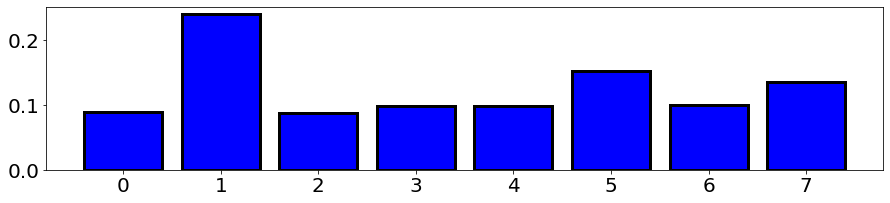

In [30]:
# plot by index
rcParams['figure.figsize'] = 15, 3
rcParams['font.size'] = 20
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_, color = 'b', edgecolor = 'k', lw = 3) 
pyplot.show()

# Plot feature importance by F score by DEFAULT

<div class="alert alert-block alert-info">
<font color=black><br>

- This is a metric that simply sums up how many times each feature is split on. It is analogous to the Frequency metric in the R version. 
- In the discussion reported in the link below there is a discussion about the F score.
- First of all it is NOT the traditional F1 score related to classification problems.

- https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/ 

<br></font>
</div>

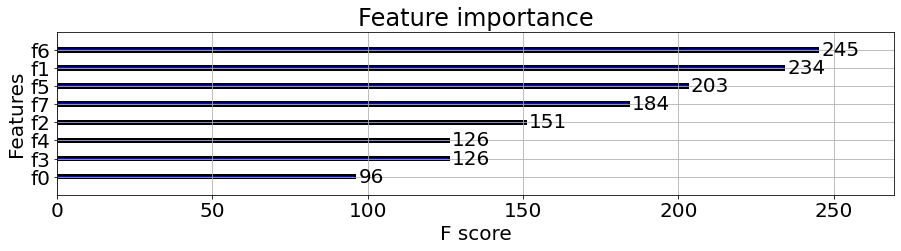

In [31]:
plot_importance(model, color = 'b', edgecolor = 'k', lw = 2)
pyplot.show()

# Exploring a bit more the different importance type options

<div class="alert alert-block alert-info">
<font color=black><br>

- https://forums.fast.ai/t/feature-importance-of-random-forest-vs-xgboost/17561
- https://arxiv.org/pdf/1706.06060.pdf [PAPER]
- https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
- https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

    
    - “gain”        = A higher value of this metric when compared to another feature implies it is more important for 
                    generating a prediction. The Gain is the most relevant attribute to interpret the relative 
                    importance of each feature. It is the average gain of splits which use the feature. 
                    It averages gain of splits which use the feature = average all the gain values of the feature 
                    if it appears multiple times
    - “weight”      = DEFAULT in XGBOOST? is the number of times a feature appears in a tree. 
    - “cover”       = is the average coverage of splits which use the feature, where coverage is defined as the number 
                    of samples affected by the split.
    - “total_gain”  =
    - “total_cover” =


- The final suggestion is that gain is more infomrative than weight, BECAUSE gain reflects the features's power of grouping similar instances into a more homogeneous child node at the split.

<br></font>
</div>

Importance type used:  weight


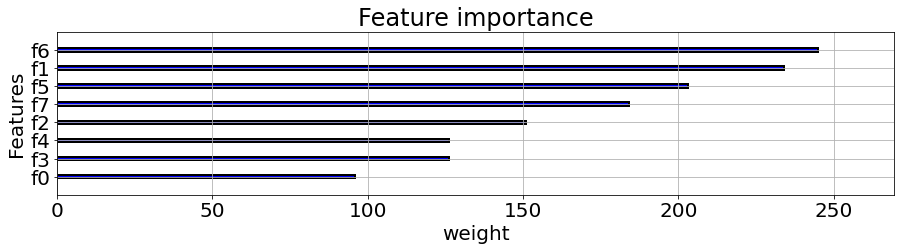

Importance type used:  gain


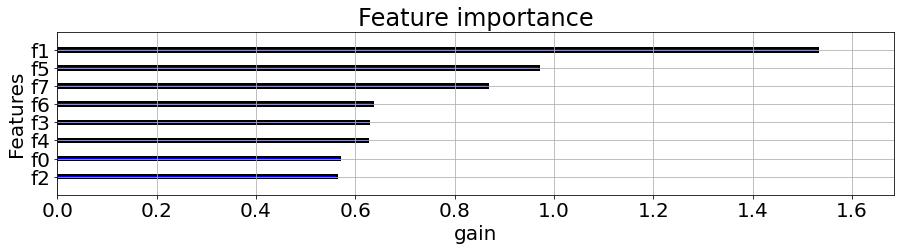

Importance type used:  cover


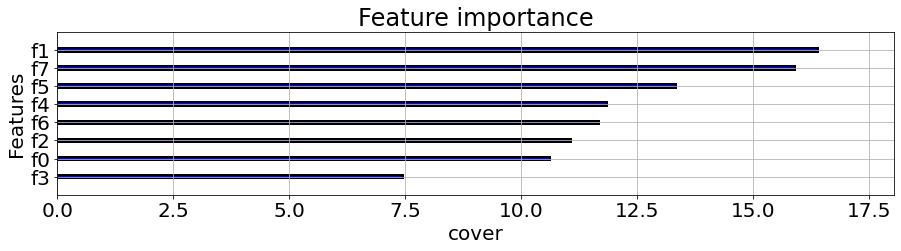

Importance type used:  total_gain


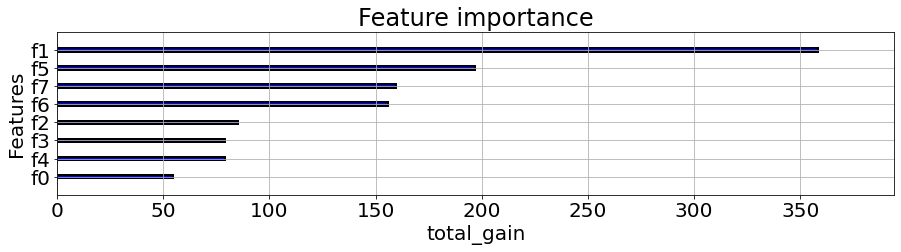

Importance type used:  total_cover


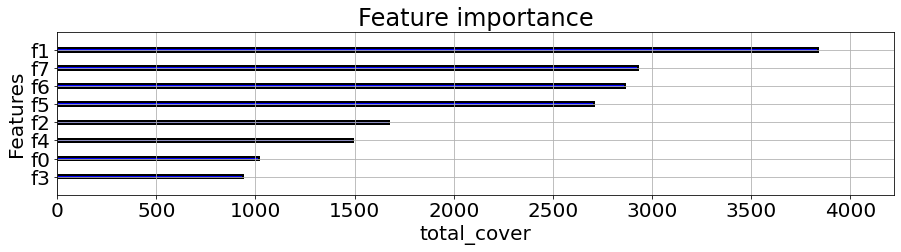

In [33]:
importanceTypeOptions = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
for singleOption in importanceTypeOptions:
    print("Importance type used: ", singleOption)
    rcParams['figure.figsize'] = 15, 3
    rcParams['font.size'] = 20
    plot_importance(model, importance_type = singleOption, color = 'b', 
                    edgecolor = 'k', lw = 2, show_values = False, xlabel = singleOption)
    pyplot.show()

# Split data into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7) 

# Fit model on all training data

In [13]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Make predictions for test data and evaluate

In [14]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy [using all features]: %.2f%%" % (accuracy * 100.0))

Accuracy [using all features]: 74.02%


# Fit model using each importance as a threshold")

In [15]:
thresholds = sort(model.feature_importances_)
print(thresholds)

NoOfFeature = []
accuracyAll=[]
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    NoOfFeature.append(select_X_train.shape[1])
    accuracyAll.append(accuracy*100.0)
    print("Threshold=%.4f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[0.08799455 0.08907107 0.09801765 0.09824965 0.09959184 0.13577047
 0.15170811 0.23959671]
Threshold=0.0880, n=8, Accuracy: 74.02%
Threshold=0.0891, n=7, Accuracy: 71.65%
Threshold=0.0980, n=6, Accuracy: 71.26%
Threshold=0.0982, n=5, Accuracy: 74.41%
Threshold=0.0996, n=4, Accuracy: 74.80%
Threshold=0.1358, n=3, Accuracy: 71.26%
Threshold=0.1517, n=2, Accuracy: 71.26%
Threshold=0.2396, n=1, Accuracy: 67.32%


# Plotting the results

Text(0, 0.5, 'Accuracy')

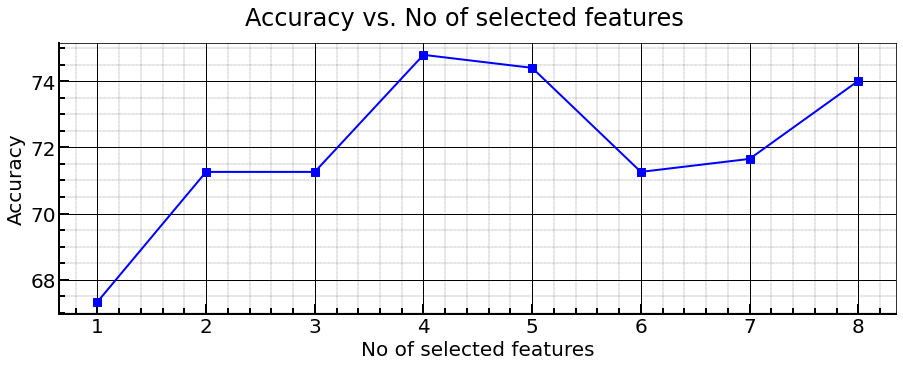

In [19]:
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20
fig = pyplot.figure() 
fig.suptitle('Accuracy vs. No of selected features') 
ax = fig.add_subplot(111) 
pyplot.plot(NoOfFeature, accuracyAll, "-bs", lw = 2, ms = 8)

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.minorticks_on()
ax.set_xlabel("No of selected features")
ax.set_ylabel("Accuracy")

<div class="alert alert-block alert-info">
<font color=black><br>

- We can see that the performance of the model is NOT best when the No of feature is max.

<br></font>
</div>

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

<br></font>
</div>